###**ATOC4500 Data Science Lab: Application Lab #1**
###last updated: January 24, 2022
**>>>> NOTE: Please run this and other notebooks using a Chrome browser**

LEARNING GOALS:
1) Use Google Colab and Python to apply data science methods: read in data, make line plots and histograms, do computations
2) Compute statistical indices of data using a function
3) Compare the data distribution to a normal distribution: Q-Q plot
4) Compare normal distributions with different mean and standard deviations
5) Compute confidence intervals using z-statistic and t-statistic


**STEP 1: Import functions we need**


In [ ]:
import datetime
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
#from scipy.stats import norm
import scipy.stats as stats
from scipy import integrate

from google.colab import files

**STEP 2: Upload the data we want to perform calculations on**

** The data file storing global mean surface temperature anomalies is called aravg.mon.land_ocean.90S.90N.v5.0.0.202111.asc.  You should save it on your laptop.  You will upload the data in the next cell**

For reference: This file can be found at https://www.ncei.noaa.gov/data/noaa-global-surface-temperature/v5/access/timeseries/ and is described at https://www.ncdc.noaa.gov/data-access/marineocean-data/noaa-global-surface-temperature-noaaglobaltemp

**NOTES on the data**: 
*   anomalies are based on 1971-2000 average.  recall: anomalies = difference from the long-term average
*   monthly data starts in January 1880
*   from the README file (00_Readme_timeseries.txt) we see that we need the first 3 columns for the monthly data (file name: aravg.mon.*): 1st column = year, 2nd column = month, 3rd column = anomaly of temperature (K)

In [ ]:
# PLEASE MAKE SURE YOU ARE USING GOOGLE CHROME as your browser, otherwise it may not load the file
# click on "Choose Files" to upload aravg.mon.land_ocean.90S.90N.v5.0.0.202111.asc
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving aravg.mon.land_ocean.90S.90N.v5.0.0.202111.asc to aravg.mon.land_ocean.90S.90N.v5.0.0.202111 (4).asc
User uploaded file "aravg.mon.land_ocean.90S.90N.v5.0.0.202111.asc" with length 177112 bytes


**STEP 3: SELECT and LOOK AT YOUR DATA by PRINTING OUT information about the data frame (d)**

In [ ]:
## select the time period to look at, including the indices needed to subset the data
nyrs = 141                    # number of years.  141 will give you 1880-2020
ind_months_start = 0;         # month index to start.  

## Note: since python is 0 based, selecting 0 gives you the index for 
  ##the first value in the dataset (January 1880)
ind_months_end   = nyrs*12;   # month index to end.
lst = uploaded['aravg.mon.land_ocean.90S.90N.v5.0.0.202111.asc'].decode(encoding="utf-8", errors="strict").split('\n');
### open a Pandas data frame with the data only in the time period we selected above
d   = pd.Series(lst).str.split(expand=True).astype(float)[ind_months_start:ind_months_end];

In [ ]:
#### LOOK AT YOUR DATA - your data frame is the variable d

# print the data type
print(type(d))

# print the shape of d ... The shape should be (nyrs*12,10)
print(d.shape) 
print(d[:][0].shape)

# print the values of the data
print(d)
print(d[:][0])

# print value in column 0 and row 2
print(d[0][2])
# print value in column 2 and row 0
print(d[2][0])

<class 'pandas.core.frame.DataFrame'>
(1692, 10)
(1692,)
           0     1         2         3  ...         6         7         8         9
0     1880.0   1.0 -0.377346  0.008683  ...  0.007050  0.132804  0.121661  0.015000
1     1880.0   2.0 -0.487104  0.008072  ...  0.006997  0.173129  0.094256  0.078873
2     1880.0   3.0 -0.445706  0.008159  ...  0.007085  0.132580  0.076598  0.055981
3     1880.0   4.0 -0.381290  0.008189  ...  0.007115  0.123356  0.073472  0.049885
4     1880.0   5.0 -0.418634  0.008172  ...  0.007097  0.082808  0.060698  0.022110
...      ...   ...       ...       ...  ...       ...       ...       ...       ...
1687  2020.0   8.0  0.641288  0.006666  ...  0.004193  0.117026  0.072951  0.044075
1688  2020.0   9.0  0.658417  0.006982  ...  0.004490  0.118362  0.068672  0.049690
1689  2020.0  10.0  0.562858  0.005939  ...  0.004671  0.115616  0.094232  0.021383
1690  2020.0  11.0  0.680691  0.007397  ...  0.004835  0.145456  0.092115  0.053341
1691  2020.0  12.0 

####**Question 1 (5p)**: What is a Panda data frame (Google it!)? What is found in the first column of the data frame? What is found in the second column of the data frame? ####

---

**Answer**: Edit this cell and put your answer here

**STEP 4: We're ready for data science calculations.  Let's go! We'll start by calculating the annual mean from the monthly data**

In [ ]:
## create a timeseries of annual means
## (i.e., we will average all the months in each year to make one value for each year)

# create a yearly timeseries
d_yr = d.groupby(d[0][:]).mean()
print(d_yr.shape)  ## should be [nyrs,10]
# look at the values (note: the second column now is the average of all months for that year, 
# groupby took the average for all values that were the same in the first column of the data frame
print(d_yr)
# look at the time axis (the first column in the dataframe) - should now just be year...
print(d_yr[0][:])

####**Question 2 (5p)**: What is the shape of the array with the annual means (d_yr)? How do you find the shape of a variable?  Why is the shape of a variable important?


**Answer**: Edit this cell and put your answer here




**STEP 5: Plot our data... yet another way to LOOK AT YOUR DATA**

In [ ]:
##Before we plot - Let's create a time axis in years (one value per month, each value in the middle of the month).
timemo = d[0][:] + (1/24)+((d[1][:]-1)*1/12)
print(d.shape)
# look at the time axis we created
print(timemo.shape)
print(timemo)

(1692, 10)
(1692,)
0       1880.041667
1       1880.125000
2       1880.208333
3       1880.291667
4       1880.375000
           ...     
1687    2020.625000
1688    2020.708333
1689    2020.791667
1690    2020.875000
1691    2020.958333
Length: 1692, dtype: float64


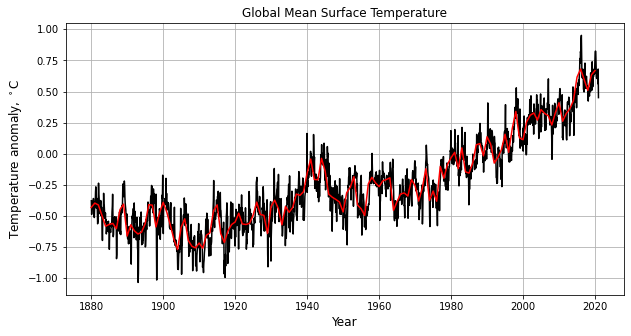

In [ ]:
# We'll define a function to plot data (data in input should have the same format as d)
def plot_data(timemo,d,xlab):
  plt.close()
  plt.figure(figsize=(10,5))
  plt.plot(timemo,d[2], color = 'black')
  # show title, labels, grid
  font = {'family': 'Sans',
  'color': 'black', 'weight': 'normal', 'size': 12,}
  plt.title('Global Mean Surface Temperature', fontdict = font) 
  plt.xlabel(xlab, fontdict = font)
  plt.ylabel('Temperature anomaly, $^\circ$C', fontdict = font)
  plt.grid()

# Then we can call the function above and make a plot for data in d

### first we'll plot the monthly averages
plot_data(timemo,d,'Year')

### next, we'll plot the yearly avearages
d_yearly = d.groupby(d[0][:]).mean()
plt.plot(d_yr[0],d_yr[2], color = 'red');

####**Question 3 (5p)**: What is plotted in black?  What is plotted in red?  Why is the red curve smoother than the black curve?

**Answer**: Edit this cell and put your answer here

####**Question 4 (5p)**: Why was the array timemo useful for plotting? ####


**Answer**: Edit this cell and put your answer here

**STEP 6: Calculate and Plot histograms of the data**

In [ ]:
# define bins for the histogram
delta= .1                               ## bin size
minbin=-4.05                           ## minimum bin value
maxbin=4.1                              ## maximum bin value
hist_bins = np.arange(minbin,maxbin,delta) ## bins
print(hist_bins)

[-4.05 -3.95 -3.85 -3.75 -3.65 -3.55 -3.45 -3.35 -3.25 -3.15 -3.05 -2.95
 -2.85 -2.75 -2.65 -2.55 -2.45 -2.35 -2.25 -2.15 -2.05 -1.95 -1.85 -1.75
 -1.65 -1.55 -1.45 -1.35 -1.25 -1.15 -1.05 -0.95 -0.85 -0.75 -0.65 -0.55
 -0.45 -0.35 -0.25 -0.15 -0.05  0.05  0.15  0.25  0.35  0.45  0.55  0.65
  0.75  0.85  0.95  1.05  1.15  1.25  1.35  1.45  1.55  1.65  1.75  1.85
  1.95  2.05  2.15  2.25  2.35  2.45  2.55  2.65  2.75  2.85  2.95  3.05
  3.15  3.25  3.35  3.45  3.55  3.65  3.75  3.85  3.95  4.05]


###**Question 5 (5p)**: Why did we set minbin=4.05 but maxbin=4.1?  Why aren't they the same?  What happens when you set minbin=-4.05 and maxbin=4.05?  Do you get the bins that you want? (Hint: this is a python "gotcha"!!)

**Answer**: Edit this cell and put your answer here

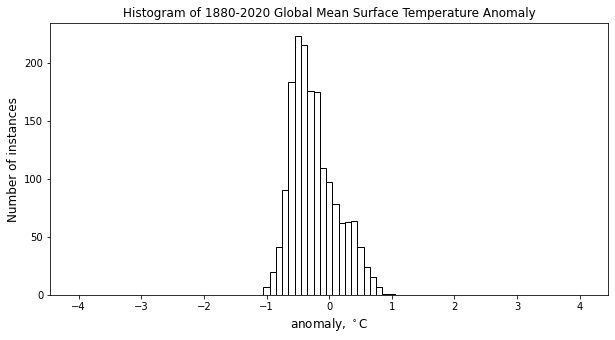

In [ ]:
# define a function to plot an histogram of the data
# note: this function assumes that the data that is input has the same format as d
def plot_data_hist(d,hist_bins):
  h, mids = np.histogram(d[2],bins=hist_bins)
  plt.figure(figsize=(10,5))
  plt.hist(d[2],bins=mids,facecolor='w',edgecolor="k") 
  #plt.plot(mids[0:-1]+(delta/2),h)
  font = {'family': 'Sans','color': 'black', 'weight': 'normal', 'size': 12,}
  plt.title('Histogram of '+f"{np.int(min(d[0][:]))}"+'-'+f"{np.int(max(d[0][:]))}"+' Global Mean Surface Temperature Anomaly', 
            fontdict = font) 
  plt.xlabel('anomaly, $^\circ$C', fontdict = font) 
  plt.ylabel("Number of instances", fontdict = font)

# call the function and make a plot for data in d
plot_data_hist(d,hist_bins)

###**Question 6 (5p)**: Describe what the histogram shows.  Why are there so many instances of temperature anomalies that are less than 0?

**Answer**: Edit this cell and put your answer here

**STEP 9: Calculate basic statistics for our data**

In [ ]:
# create a function that shows statistical indices for the data and min/max
def stat_ind(data):
  fig = plt.figure(1, figsize=(3, 6)) 
  ax  = fig.add_subplot(111)
  font = {'family': 'Sans','color': 'black', 'weight': 'normal', 'size': 12,}
  ax.boxplot(data)
  plt.xticks([])
  plt.ylabel('Temperature anomaly, $^\circ$C', fontdict = font) 
  print('min      : ' + f"{data.min():.3f}" + ' degC')
  print('max      : ' + f"{data.max():.3f}" + ' degC')
  print('mean     : ' + f"{data.mean():.3f}" + ' degC')
  print('median   : ' + f"{data.median():.3f}"  + ' degC')
  print('5-, 25-, 50-, 75-, 95-parcentile (degC): ')
  print(data.quantile([.05, 0.25, 0.5, 0.75, .95]))
  print('var      : ' + f"{data.var():.3f}"  + ' degC^2')
  print('std      : ' + f"{data.std():.3f}"  + ' degC')
  print('skewness : ' + f"{data.skew():.3f}")
  print('kurtosis : ' + f"{data.kurtosis():.3f}")

min      : -1.034 degC
max      : 0.951 degC
mean     : -0.241 degC
median   : -0.317 degC
5-, 25-, 50-, 75-, 95-parcentile (degC): 
0.05   -0.728048
0.25   -0.514172
0.50   -0.316879
0.75   -0.025161
0.95    0.459774
Name: 2, dtype: float64
var      : 0.134 degC^2
std      : 0.366 degC
skewness : 0.667
kurtosis : -0.127


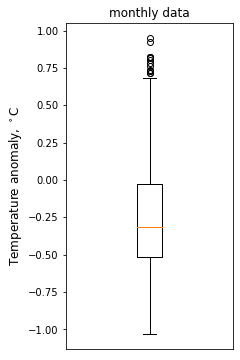

In [ ]:
# compute statistical indices for the monthly data by calling the function
stat_ind(d[2])
# define font
font = {'family': 'Sans','color': 'black', 'weight': 'normal', 'size': 12,}
plt.title('monthly data', fontdict = font);   

###**Question 7 (5p)**: Compute statistical indices for the yearly data by calling the function stat_ind.  Compare the new figure (for the yearly time series) with the previous figure (for the monthly time series), how do the statistics differ? ###

---


In [ ]:
### put your answer in code format here:

**Answer**: Edit this cell and put your answer here

In [ ]:
## Here's another function with more calculations in it -- Can you make it work?  
## Are there other stats you would want to add?
## This is EXTRA... (for those who are bored and want more...)

# uncomment the suggestions below (in this cell) and fill in the blanks borrowing from previous code
# (you will need to edit previous code)
# def stat_ind_new(data):
#   fig = plt.figure(1, figsize=(3, 6)) 
#   ax  = fig.add_subplot(111)
#   font = {'family': 'Sans',
#   'color': 'black', 'weight': 'normal', 'size': 12,
#   }
#   ax.boxplot(data)
#   plt.xticks([])
#   plt.ylabel('Temperature anomaly, $^\circ$C', fontdict = font) 
#   print('min             : ' + f"{data.min():.3f}" + ' degC')
#   print('max             : ' + f"{data.max():.3f}" + ' degC')
#   print('mean            : ' + f"{data.mean():.3f}" + ' degC')
#   print('mean_slides     : ' + f"{  FILL_HERE    :.3f}" + ' degC')
#   print('median          : ' + f"{data.median():.3f}"  + ' degC')
#   print('5-, 25-, 50-, 75-, 95-parcentile (degC): ')
#   print(data.quantile([.05, 0.25, 0.5, 0.75, .95]))
#   print('var             : ' + f"{data.var():.3f}"  + ' degC^2')
#   mu           =      FILL_HERE (to calculate the mean)
#   data_anom    =      FILL_HERE (subtract the mean from data)
#   data_anom_sq = np.power(data_anom,2) # square each element in the vector data_anom, i.e. x_sq = x*x
#   var          =      FILL_HERE
#   print('var_slides      : ' + f"{var:.3f}"  + ' degC^2')
#   print('std             : ' + f"{data.std():.3f}"  + ' degC')
#   print('std_slides      : ' + f"{  FILL_HERE    :.3f}"  + ' degC')
#   print('skewness        : ' + f"{data.skew():.3f}")
#   data_anom_cb = np.power(data_anom,3)
#   print('skewness_slides : ' + f"{data_anom_cb.sum()/(len(data)-3)/(np.power(var,3/2)):.3f}")
#   print('kurtosis        : ' + f"{data.kurtosis():.3f}")
  
# # compute statistical indices for the yearly data: what differences do you see from monthly data?
# stat_ind_new(d_yearly[2])
# plt.title('For the yearly time series', fontdict = font) 

**STEP 10: USE REGRESSION CALCULATE THE LINEAR TREND AND PLOT IT (Note: we will discuss and do a lot more regression in unit #2) -- Here, we are making this calculation to quantify the observed global warming, WOW**


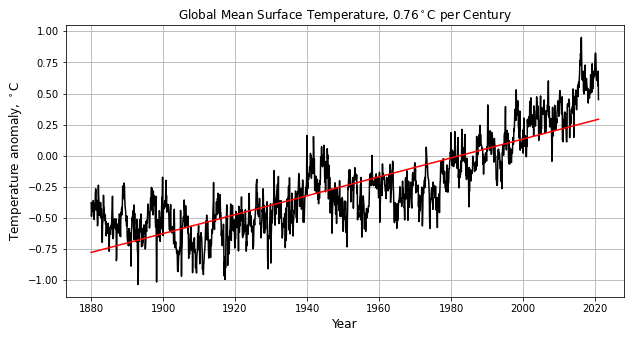

In [ ]:
### calculate the linear regression and plot the resulting linear trend line
lm = LinearRegression() 
lm.fit(np.array(timemo).reshape(-1, 1), d[2]) 
predictions = lm.predict(np.array(timemo).reshape(-1, 1))

# Now we can plot both the original data and the linear trend line
plot_data(timemo,d,'Year')
plt.plot(timemo, predictions, '-', color = 'red') 

font = {'family': 'Sans','color': 'black', 'weight': 'normal', 'size': 12,}
plt.title('Global Mean Surface Temperature, '+f"{lm.coef_[0]*100:.2f}"+'$^\circ$C per Century', fontdict = font); 

**Let's DETREND our DATA.  We will subtract the estimated line from the data.  Look at your detrended data by plotting it.**

**You are going to get sick of me saying this... but LOOK AT YOUR DATA.**

(1692,)
(1692,)
(1692, 10)
(1692,)


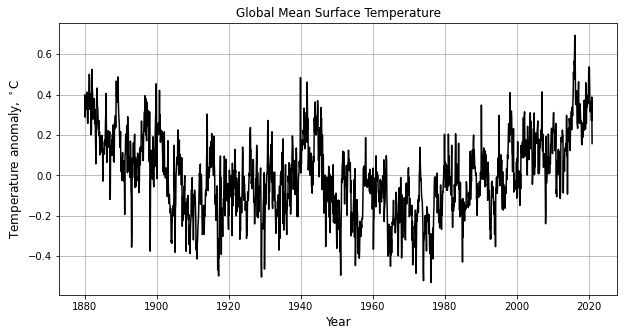

In [ ]:
### Copy d into a new variable d_detrend
d_detrend = d.copy() 
# This is another python gotcha!! Don't do this - as this links the arrays, instead of copying them
##d_detrend = d ### BE VERY CAREFUL IF YOU DO THIS...
print(d_detrend[2].shape)
print(predictions.shape)
### Subtract the linear trend predicted value (array called predictions)
d_detrend[2]=d_detrend[2]-predictions
print(d_detrend.shape)
print(timemo.shape)
plot_data(timemo,d_detrend,'Year')

**STEP 11: Next we'll compare our data to a normal distribution - Let's plot an histogram of the data again.**

**And also add a normal distribution with the same standard deviation and mean as the data**

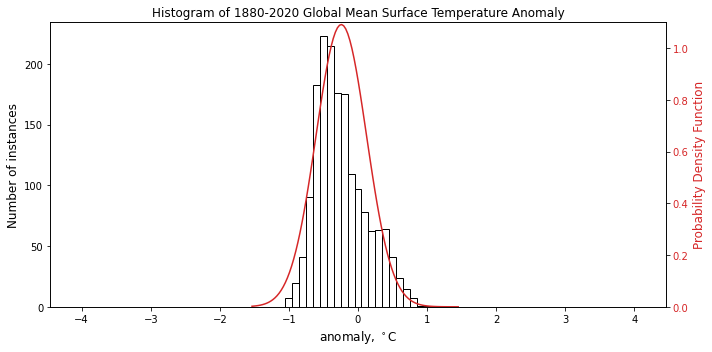

In [ ]:
plot_data_hist(d,hist_bins)
xfit = np.linspace(np.min(d[2])-0.5,np.max(d[2])+0.5,100) 
#print(xfit) ## uncomment me if you want to see the values
yfit = stats.norm.pdf(xfit,np.mean(d[2]),np.std(d[2]))

ax2 = plt.gca().twinx()  # start a second axes that shares the same x-axis
color = 'tab:red'
font = {'family': 'Sans','color': color, 'weight': 'normal', 'size': 12,}
ax2.set_ylabel('Probability Density Function', color=color, fontdict = font)  
# we already handled the x-label with ax1
ax2.plot(xfit,yfit, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim([0,1.1])

plt.gcf().tight_layout()
# print(yfit.sum()*(xfit[1]-xfit[0]))

**Next, Let's compare the data distribution with a normal distribution using a Q-Q plot.**

**Google "Q-Q plot" to learn more...**

In [ ]:
# "standardize" the data to have a mean equal to zero and a standard deviation equal to 1
d_stdzd = (d[2]-d[2].mean())/d[2].std()
print('Mean of scaled data : ' + f"{d_stdzd.mean():.3f}" + ' degC')
print('Median of scaled data : ' + f"{d_stdzd.median():.3f}" + ' degC')
print('Standard Deviation of scaled data : ' + f"{d_stdzd.std():.3f}" + ' degC')
print(d_stdzd.shape)

Mean of scaled data : -0.000 degC
Median of scaled data : -0.207 degC
Standard Deviation of scaled data : 1.000 degC
(1692,)


In [ ]:
# create a dataframe with the right format for the plotting function
d_stdzd_pl    = d
d_stdzd_pl[2] = d_stdzd

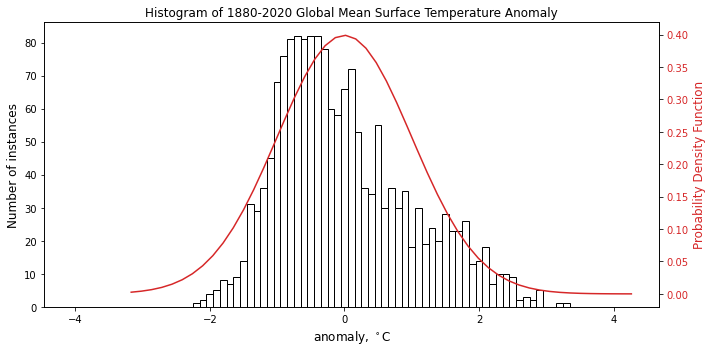

In [ ]:
plot_data_hist(d_stdzd_pl,hist_bins)
xfit = np.linspace(np.min(d_stdzd_pl[2])-1,np.max(d_stdzd_pl[2])+1,50) 
yfit = stats.norm.pdf(xfit,np.mean(d_stdzd_pl[2]),np.std(d_stdzd_pl[2]))

ax2 = plt.gca().twinx()  # start a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Probability Density Function', color=color, fontdict = font)  
# we already handled the x-label with ax1
ax2.plot(xfit,yfit, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.gcf().tight_layout()

In [ ]:
# let's make a function to create a Q-Q plot called "QQ_plot"
def QQ_plot(d_stdzd):
  plt.close()
  fig = plt.figure(figsize=(15,6.5))
  plt.subplot(121)
  plt.plot(stats.norm.ppf(q=np.arange(0,1,.01), loc=0, scale=1),stats.norm.ppf(q=np.arange(0,1,.01), loc=0, scale=1), color = 'black')
  plt.plot(stats.norm.ppf(q=np.arange(0,1,.01), loc=0, scale=1),d_stdzd.quantile(np.arange(0,1,.01)), color = 'red', marker='.', markersize=5, linestyle='None')
  plt.xlabel('Theoretical quantiles, $^\circ$C', fontdict = font, color = 'black') 
  plt.ylabel('Sample quantiles, $^\circ$C', fontdict = font, color = 'black') 
  plt.title('Q-Q plot', fontdict = font, color = 'black')
  plt.grid()
  plt.subplot(122)
  plt.plot(stats.norm.ppf(q=np.arange(0,1,.01), loc=0, scale=1),d_stdzd.quantile(np.arange(0,1,.01))-stats.norm.ppf(q=np.arange(0,1,.01), loc=0, scale=1), color = 'black')
  plt.plot(stats.norm.ppf(q=np.arange(0,1,.01), loc=0, scale=1),0*d_stdzd.quantile(np.arange(0,1,.01)), color = 'black')
  plt.xlabel('Theoretical quantiles, $^\circ$C', fontdict = font, color = 'black') 
  plt.ylabel('Sample quantiles - theoretical, $^\circ$C', fontdict = font, color = 'black') 
  plt.grid()

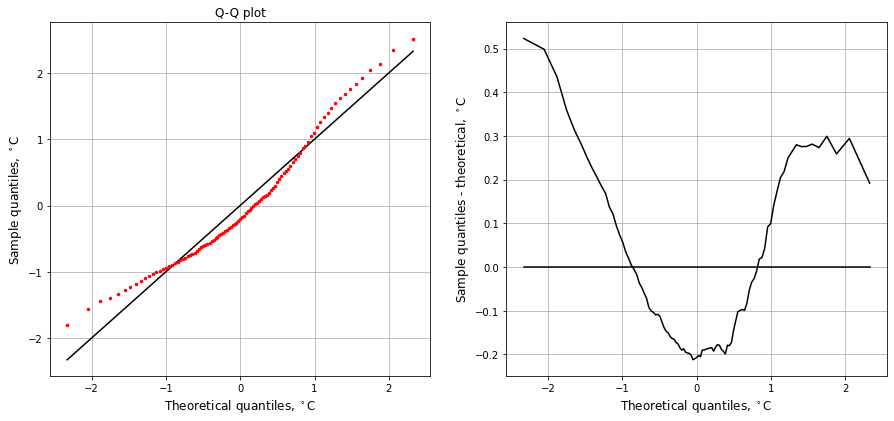

In [ ]:
## execute the plotting function using the dataframe d_stdzd
QQ_plot(d_stdzd)

**What happens if we create the Q-Q plot for synthetic data (of the same size as the original data) derived from a normal distribution?**

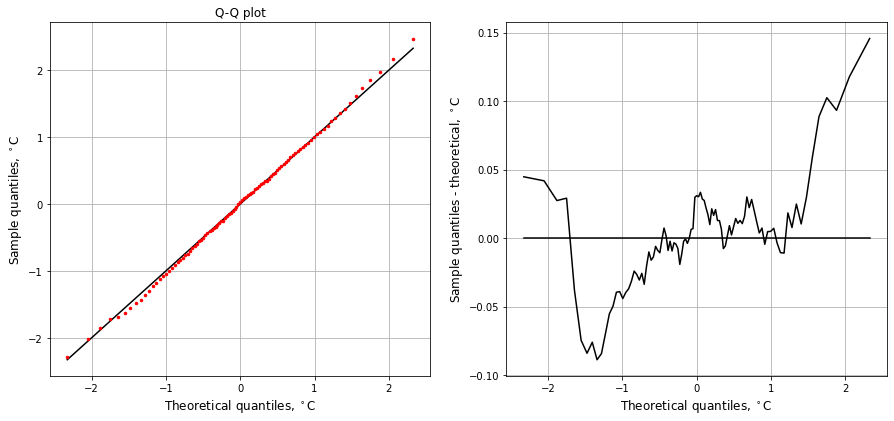

In [ ]:
QQ_plot(pd.Series(np.random.normal(loc=0.0,scale=1.0,size=np.shape(d_stdzd))))

###**Question 8 (5 p)**: Does the Q-Q plot for "synthetic data" (i.e., data sampled from a normal distribution) compares with the Q-Q plot from the real data? What does this suggest about the real data? What happens if we create the Q-Q plot for dataSTAR using a smaller sample from a normal distribution? (i.e. using a vector of "synthetic data" with only 20 values) Create a plot for this case before answering the last part of the question. ###

In [ ]:
## your answer here... code for the synthetic data with only 20 values, including a plot

**Answer**: Edit this cell and put your answer here

### **Now we'll plot some normal distribution examples with different means and standard deviations.** ###

['std = 0.5: 0.6826894921370859']
['std = 0.5: 0.6687123293258339']
['std = 1.0: 0.6826894921370859']
['std = 1.0: 0.6826894921370859']
['std = 1.5: 0.6826894921370859']
['std = 1.5: 0.680700261184219']
['std = 2.0: 0.6826894921370859']
['std = 2.0: 0.6687123293258339']
['std = 2.5: 0.6826894921370859']
['std = 2.5: 0.649212076284548']


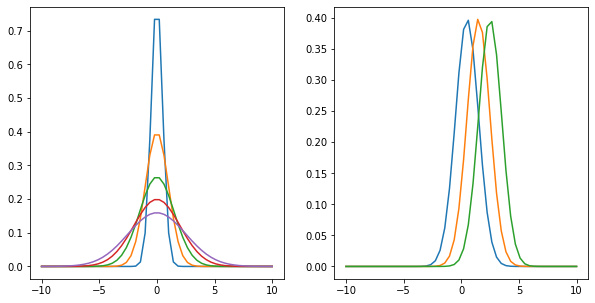

In [ ]:
xfit = np.linspace(-10,10,50) 
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
for x in np.arange(.5,3,.5):
    yfit = stats.norm.pdf(xfit,0,x)
    plt.plot(xfit,yfit)
    print(['std = ' +str(x) +': ' + str(stats.norm(0,x).cdf(x)-stats.norm(0,x).cdf(-x))])
    print(['std = ' +str(x) +': ' + str(stats.norm(0,1).cdf(x)-stats.norm(0,x).cdf(-1))])
#
plt.subplot(122)
for x in np.arange(.5,3,1):
    yfit = stats.norm.pdf(xfit,x,1)
    plt.plot(xfit,yfit)

### **Next, we calculate confidence intervals on the global mean temperature data** ###

*   Using the T-statistic (assume normally distributed, appropriate for N less than ~30)
*   Using the Z-statistic (appropriate for N greater than ~30)



In [ ]:
#### define functions

## Function to calculate the 95% and 99% confidence limits using t-statistic
def tstat(sample_mean,sample_std,df):
  ## Note: Python calculates left/lower-tail probabilities by default, 
  ## so for the 95% confidence interval, use 0.975
  tstat95=stats.t.ppf(0.975,df)
  low_limit95=sample_mean-tstat95*(sample_std/np.sqrt(df))
  high_limit95=sample_mean+tstat95*(sample_std/np.sqrt(df))

  ## so for the 99% confidence interval, use 0.995
  tstat99=stats.t.ppf(0.995,df)
  low_limit99=sample_mean-tstat99*(sample_std/np.sqrt(df))
  high_limit99=sample_mean+tstat99*(sample_std/np.sqrt(df))

  print('CONFIDENCE INTERVALS USING T-STATISTIC')
  print(f'The sample mean is {np.round(sample_mean,2)}')
  print(f'The degrees of freedom is {df} for N={N}')
  print(f'The 95% confidence interval on the true mean is \
  {np.round(low_limit95,2)} and {np.round(high_limit95,2)}')
  print(f'The 99% confidence interval on the true mean is \
  {np.round(low_limit99,2)} and {np.round(high_limit99,2)}')

## Function to calculate the 95% and 99% confidence limits using z-statistic
def zstat(sample_mean,sample_std,N):
  ## Note: Python calculates left/lower-tail probabilities by default, 
  ## so for the 95% confidence interval, use 0.975
  zstat95=stats.norm.ppf(0.975)
  low_limit95=sample_mean-zstat95*(sample_std/np.sqrt(N))
  high_limit95=sample_mean-zstat95*(sample_std/np.sqrt(N))

  ## so for the 99% confidence interval, use 0.995
  zstat99=stats.norm.ppf(0.995)
  low_limit99=sample_mean-zstat99*(sample_std/np.sqrt(N))
  high_limit99=sample_mean-zstat99*(sample_std/np.sqrt(N))

  print('CONFIDENCE INTERVALS USING Z-STATISTIC')
  print(f'The sample mean is {np.round(sample_mean,2)}')
  print(f'N={N}')
  print(f'The 95% confidence interval on the true mean is \
  {np.round(low_limit95,2)} and {np.round(high_limit95,2)}')
  print(f'The 99% confidence interval on the true mean is \
  {np.round(low_limit99,2)} and {np.round(high_limit99,2)}')

In [ ]:
#### now let's do some calculations of the confidence limits!!

### subset the years you use
minyear=1990
maxyear=1999

### standardize the yearly global mean temperature data
d_stdzd_yr = (d_yr[2]-d_yr[2].mean())/d_yr[2].std()
print('Mean of standardized data : ' + f"{d_stdzd_yr.mean():.3f}" + ' degC')
print('Median of standardized data : ' + f"{d_stdzd_yr.median():.3f}" + ' degC')
print('Standard Deviation of standardized data : ' + f"{d_stdzd_yr.std():.3f}" + ' degC')
print(d_stdzd_yr.shape)

### create a pandas data frame with just the year and the temperature
df = pd.DataFrame({'Year':d_yr[0],'T_anom':d_stdzd_yr})
print(df.shape)
#df ## uncomment me to look at your data frame 

sample=df[(df["Year"]>(minyear-1)) & (df["Year"]<(maxyear+1))];
print(sample.shape)
#print(sample)  ## uncomment me to look at your data 

## calculate the sample mean and standard deviation
sample_mean=sample['T_anom'].mean()
print(np.round(sample_mean,2))
sample_std=sample['T_anom'].std()
print(np.round(sample_std,2))
N=sample.shape[0]
print(N)
df=N-1
print(df)

tstat(sample_mean,sample_std,df)
zstat(sample_mean,sample_std,N)

Mean of standardized data : 0.000 degC
Median of standardized data : -0.263 degC
Standard Deviation of standardized data : 1.000 degC
(141,)
(141, 2)
(10, 2)
0.96
0.35
10
9
CONFIDENCE INTERVALS USING T-STATISTIC
The sample mean is 0.96
The degrees of freedom is 9 for N=10
The 95% confidence interval on the true mean is   0.7 and 1.22
The 99% confidence interval on the true mean is   0.59 and 1.34
CONFIDENCE INTERVALS USING Z-STATISTIC
The sample mean is 0.96
N=10
The 95% confidence interval on the true mean is   0.75 and 0.75
The 99% confidence interval on the true mean is   0.68 and 0.68


###**Question 10 (5p)**: Are global mean temperatures in the 21st century (2000-2020) different than temperatures in the 20th century (1900-1999)? (*Hint: do the 95% confidence intervals overlap? Are you using t-stat or z-stat and why?*)###

**Answer**: Edit this cell and put your answer here

In [ ]:
### answere here include any relevant code here - consider making a function!!

## END OF APPLICATION LAB #1 - Congratulations!! ##

###**BONUS**: Write code below to answer upcoming questions. Assume you have 50 years of monthly ENSO indices (Z), and that the index is well approximated by a standard normal.

What is the probability that a randomly chosen month has an ENSO index of 1.23 or smaller?

In [278]:
# write your own code here
# hint: use calculation for cdf of a standard normal distribution

What is the probability that a randomly chosen month has an ENSO index of 2 or greater?

In [279]:
# write your own code here
## hint: use calculation for quantiles of a standard normal distribution

What ENSO index ε gives Pr(Z >= ε) = 0.1?

In [ ]:
# write your own code here
## hint: use calculation for quantiles of a standard normal distribution

What ENSO index ε gives Pr(Z <= ε) = 0.9?

In [281]:
## hint: how is this different than the previous question